In [2]:
"""
import Default Package
"""
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib as il
from pprint import pprint as pp

In [4]:
"""
GoogleAuth and Drive Init
"""

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

In [6]:
"""
Get CSV File in GoolgeDrive
"""
# Auto-iterate through all files that matches this query
file_list = drive.ListFile({'q': "title = '2021_01_25_PH_.csv'"}).GetList()
file_list[0]['id']

# for tmpFile in file_list:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))
#   file = tmpFile
#   del(file1)

'1vz-E-_-YHsMceGT_6XHhMuqbbAXeRoNO'

In [8]:
fileId = file_list[0]['id']
path = 'https://drive.google.com/uc?export=download&id='+fileId
df = pd.read_csv(path
                 ,encoding='utf-8'
                 ,index_col='time')
df

,shcode,drate,price,volume,cdhrem,cshrem,bdhrem,bshrem,cdhvolume,cshvolume,bdhvolume,bshvolume,tdvolume,tsvolume,tvol
time,,,,,,,,,,,,,,,
91308,5930,0.35,87100,2506639,0,0,8948,30303,112736,72488,647316,471258,751104,513443,-237661
91308,5380,-0.78,255000,266160,0,0,2086,1824,3378,2172,21826,43890,23118,44238,21120
91309,35420,1.60,349000,290358,0,0,2999,3436,3028,1947,65412,78988,65441,77499,12058
91311,660,1.95,131000,267960,1917,3845,51585,15584,13408,8621,67037,73166,26943,62358,35415
91312,5930,0.46,87200,2508127,0,0,9023,29212,112736,72488,647496,470167,751209,513443,-237766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174027,139480,5.46,183500,434660,0,0,3998,2785,6276,7983,50252,60509,52530,65707,13177
174905,139480,5.46,183500,434660,0,0,3998,2794,6276,7983,50252,60518,52530,65707,13177
175002,139480,5.46,183500,436241,0,0,3998,2785,6276,7983,50252,60518,52530,65716,13186


In [10]:
import Funcs as fc
il.reload(fc)

<module 'Funcs' from '/Users/youngkwanji/Documents/00.MyFolder/HM/DataAnalysis/src/Funcs.py'>

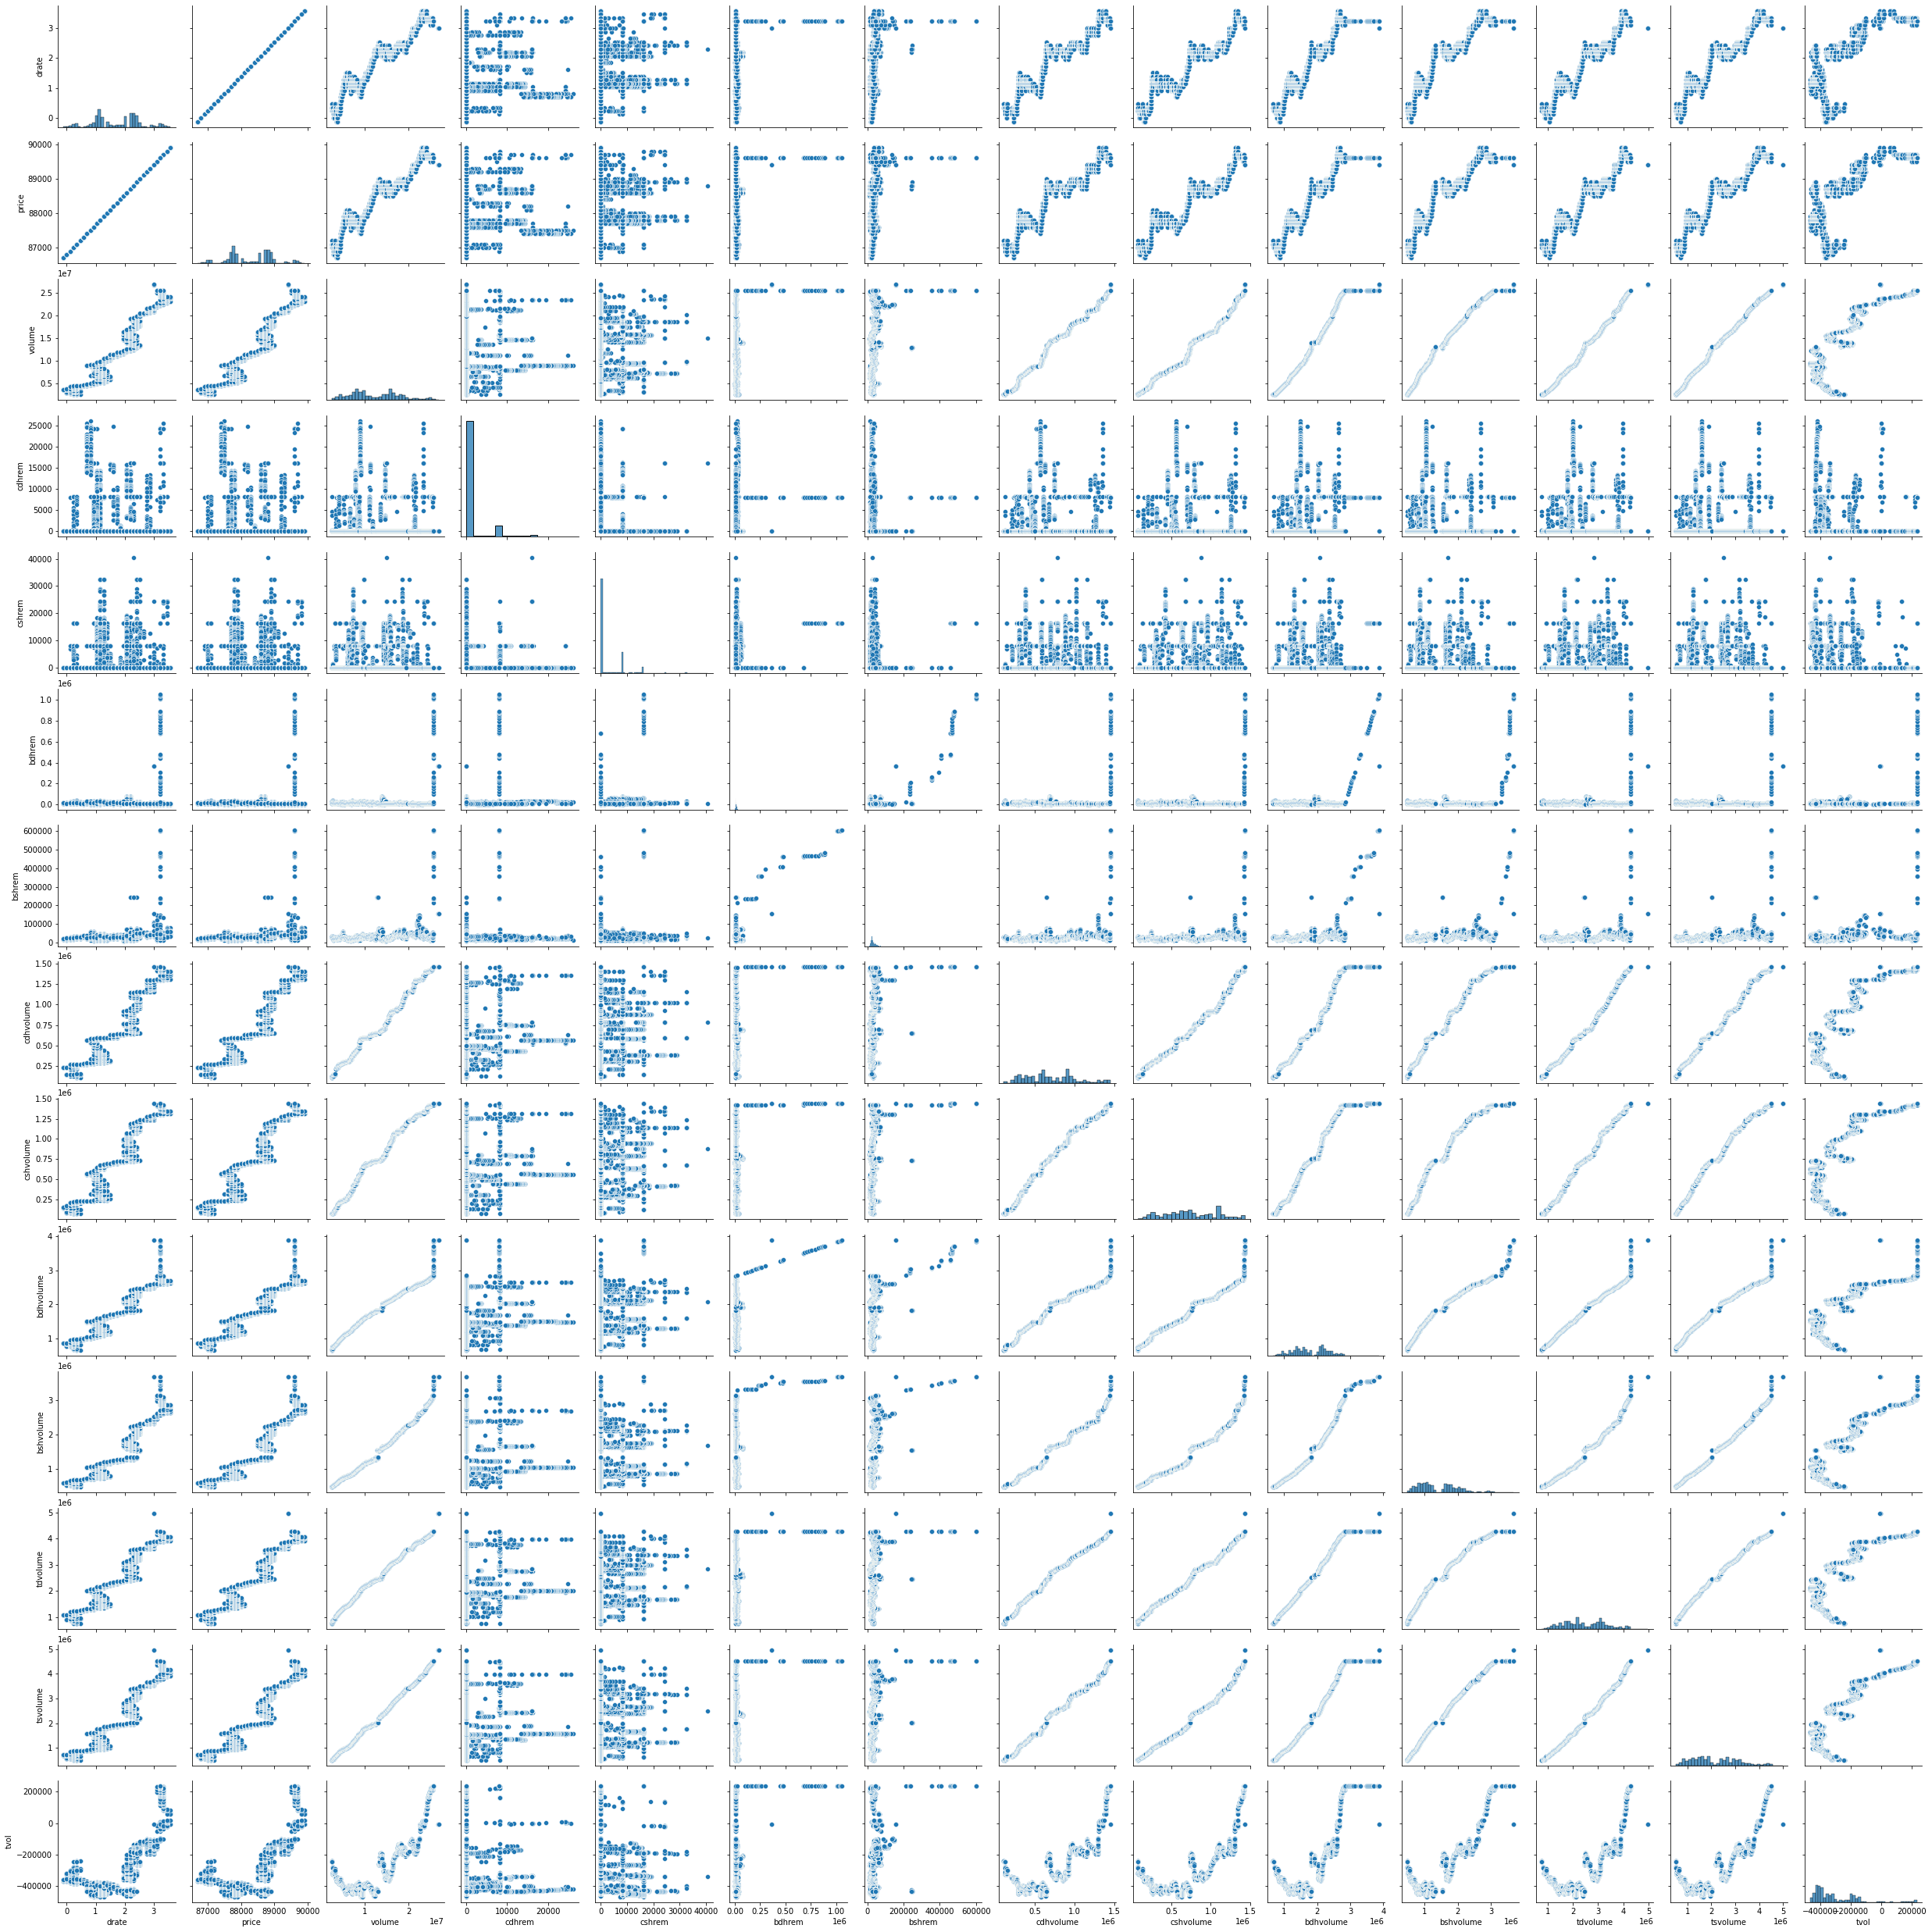

In [12]:
dfPhInfo = fc.prePrcssPhInfo(df)
samsungPH = dfPhInfo[dfPhInfo['shcode'] == '005930']
samsungPH

sns.pairplot(samsungPH)



In [13]:
sampleA = pd.DataFrame(data= samsungPH, columns=['drate'])
sampleA['preBDist'] = samsungPH['bdhvolume'] - samsungPH['bshvolume']
sampleA['preCDist'] = samsungPH['cdhvolume'] - samsungPH['cshvolume']
sampleA['preTDist'] = samsungPH['tdvolume'] - samsungPH['tsvolume']

sampleA

,drate,preBDist,preCDist,preTDist
time,,,,
91308,0.35,176058,40248,237661
91312,0.46,177329,40248,237766
91315,0.46,177386,40248,237766
91318,0.35,198595,48256,243216
91323,0.35,196608,48256,243871
...,...,...,...,...
152949,3.23,183435,20555,-232434
152955,3.23,193775,20555,-232434
153008,3.00,194175,20555,7469


In [59]:
fc.showClusterMap(sampleA)

plt.close()

<function matplotlib.pyplot.show(close=None, block=None)>

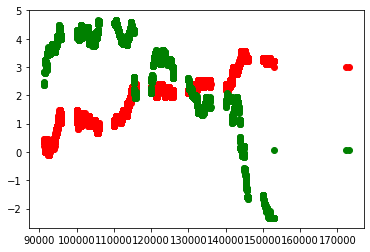

In [60]:
plt.scatter(sampleA.index, sampleA['drate'],c='red')
plt.scatter(sampleA.index, sampleA['preTDist']/100000,c='green')
# , sampleA['preTDist']
# plt.scatter(sampleA['preTDist'])
# plt.scatter(sampleA['drate'])
plt.show


In [13]:
samsungCorr = samsungPH.corrwith(samsungPH['preDist'])
samsungCorr


drate       -0.602605
price       -0.601745
volume      -0.662836
cdhrem       0.032565
cshrem       0.077832
bdhrem      -0.047710
bshrem      -0.262233
cdhvolume   -0.681248
cshvolume   -0.592421
bdhvolume   -0.581515
bshvolume   -0.731342
tdvolume    -0.622666
tsvolume    -0.685455
tvol        -0.928709
preDist      1.000000
dtype: float64

In [ ]:
# plt.scatter(samsungPH['bshvolume'], samsungPH['drate'])
# plt.show

In [12]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df


d2 = {'col1': df, 'col2': df}
pp(d2)



,col1,col2
0,1,3
1,2,4


{'col1':    col1  col2
0     1     3
1     2     4,
 'col2':    col1  col2
0     1     3
1     2     4}


In [13]:
samsungPH.corrwith(samsungPH['drate'])
# samsungS3.corrwith(samsungS3['drate'])

drate        1.000000
price        0.999951
volume      -0.735340
cdhrem      -0.134815
cshrem      -0.071412
bdhrem      -0.109704
bshrem      -0.069914
cdhvolume   -0.768452
cshvolume   -0.735987
bdhvolume   -0.746088
bshvolume   -0.493799
tdvolume    -0.763155
tsvolume    -0.709472
tvol         0.808702
dtype: float64

In [16]:
samsungS3.corrwith(samsungS3['drate'])

NameError: name 'samsungS3' is not defined

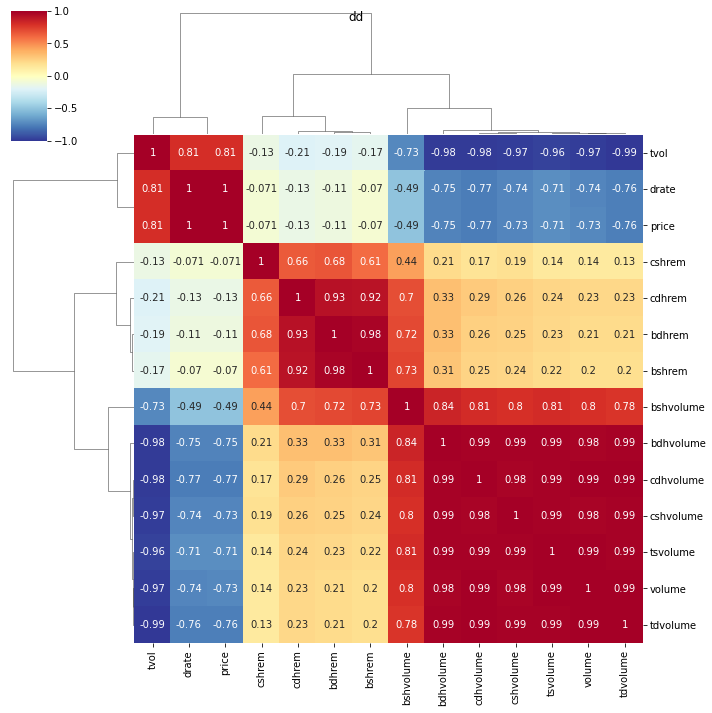

,shcode,drate,price,volume,cdhrem,cshrem,bdhrem,bshrem,cdhvolume,cshvolume,bdhvolume,bshvolume,tdvolume,tsvolume,tvol
time,,,,,,,,,,,,,,,
90928,000660,-2.63,129500,570955,0,0,52310,3322,16355,3845,193064,32787,157109,33310,-123799
90929,005930,-1.00,88800,2249478,0,0,60662,9613,137592,32344,779959,279851,856889,302582,-554307
90929,005380,-2.90,251500,560956,0,0,1136,22197,4122,969,80439,74429,83425,53201,-30224
90930,035420,2.71,322500,198305,0,0,1603,129,3697,869,24356,46017,26450,46757,20307
90933,005490,-0.18,283000,33046,0,0,754,361,2031,477,15579,11215,16856,11331,-5525
90933,017670,-0.39,254000,28811,87,0,664,306,1476,347,5775,3931,6500,3972,-2528
90934,066570,-0.71,139000,138734,186,0,2363,2983,3156,742,51897,19076,52504,16835,-35669
90934,096770,-1.96,275500,136184,0,0,1014,360,1510,355,17446,22603,17942,22598,4656
90936,006400,-0.27,752000,39117,89,0,1902,462,1510,355,20014,6119,19533,6012,-13521
